In [16]:
%%capture
# Libraries for R^2 visualization
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Library for working locally or Colab
import sys
import sys

In [17]:
!unzip /content/AIrBnB.zip

Archive:  /content/AIrBnB.zip
   creating: AIrBnB/
  inflating: AIrBnB/index.html       
   creating: __MACOSX/
   creating: __MACOSX/AIrBnB/
  inflating: __MACOSX/AIrBnB/._index.html  
   creating: AIrBnB/images/
  inflating: AIrBnB/images/treehouse.jpg  
   creating: __MACOSX/AIrBnB/images/
  inflating: __MACOSX/AIrBnB/images/._treehouse.jpg  
  inflating: AIrBnB/images/banner.jpg  
  inflating: __MACOSX/AIrBnB/images/._banner.jpg  
  inflating: AIrBnB/images/bath.jpg  
  inflating: __MACOSX/AIrBnB/images/._bath.jpg  
  inflating: AIrBnB/images/pic07.jpg  
  inflating: __MACOSX/AIrBnB/images/._pic07.jpg  
  inflating: AIrBnB/images/pic06.jpg  
  inflating: __MACOSX/AIrBnB/images/._pic06.jpg  
  inflating: AIrBnB/images/pic10.jpg  
  inflating: __MACOSX/AIrBnB/images/._pic10.jpg  
  inflating: AIrBnB/images/pic04.jpg  
  inflating: __MACOSX/AIrBnB/images/._pic04.jpg  
  inflating: AIrBnB/images/pic05.jpg  
  inflating: __MACOSX/AIrBnB/images/._pic05.jpg  
  inflating: AIrBnB/images/pi

In [47]:
!unzip /content/AB_NYC_2019.csv.zip

Archive:  /content/AB_NYC_2019.csv.zip
replace AB_NYC_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [126]:
import pandas as pd

df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
#EDA


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [23]:
type(df)

pandas.core.frame.DataFrame

In [127]:
import pandas as pd
import numpy as np

def wrangle(df):
  
  df = df.copy()                
    # Remove outliers: 
    # the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
  df = df[(df['price'] >= 50) & (df['price'] <= 500)]
    #      (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
     #
  #Dropconstant and categorical features
  df = df.drop(columns=['minimum_nights', 'host_id', 'host_name', 'name','id', 'availability_365', 'number_of_reviews', 'last_review',	'reviews_per_month',	'calculated_host_listings_count'])
  print(type(df))
  return df
df = wrangle(df)

<class 'pandas.core.frame.DataFrame'>


In [88]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [128]:
df.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80


In [129]:
df.describe()

,latitude,longitude,price
count,42824.000000,42824.000000,42824.000000
mean,40.730149,-73.954697,142.342542
std,0.053108,0.044386,86.871856
min,40.499790,-74.244420,50.000000
25%,40.691800,-73.984200,79.000000
50%,40.724780,-73.957530,120.000000
75%,40.763660,-73.939790,180.000000
max,40.911690,-73.712990,500.000000


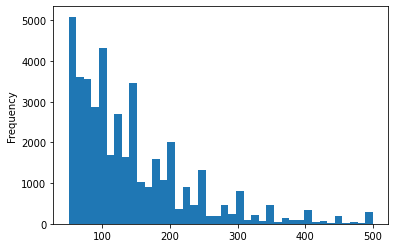

In [130]:
df.price.plot.hist(bins=40)

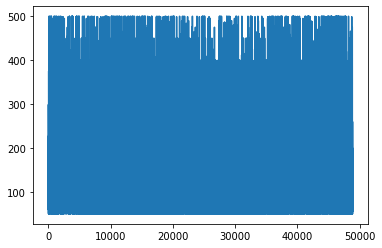

In [131]:
df.price.plot()

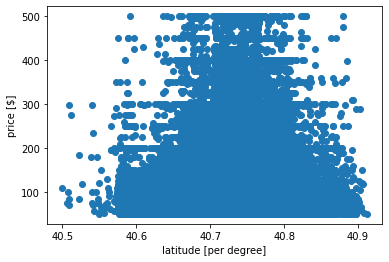

In [132]:
#Relationship price and latitude
plt.scatter(df['latitude'], df['price'])
plt.xlabel('latitude [per degree]')
plt.ylabel('price [$]');

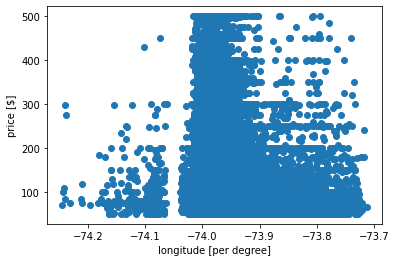

In [133]:
#Relationship price and longitude
plt.scatter(df['longitude'], df['price'])
plt.xlabel('longitude [per degree]')
plt.ylabel('price [$]');

In [134]:

y = df['price']
X = df[['latitude','longitude']]



In [136]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [137]:
#Establish a baseline
print('price:', y_train.mean())
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

price: 142.65506874106075
Baseline MAE: 65.98839940643023


In [138]:
#Build the model
#  Instantiate your model (class --> object)
model = LinearRegression()

# Fit your TRAINING data to the model
model.fit(X_train, y_train);

In [139]:
#Check metrics
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Training MAE: 62.56806333671244
Test MAE: 62.27086666044037


In [140]:
from sklearn.metrics import r2_score
r2_score(y_train,model.predict(X_train))
#r2_score(y_test), model.predict(X_test)

0.074874792087407

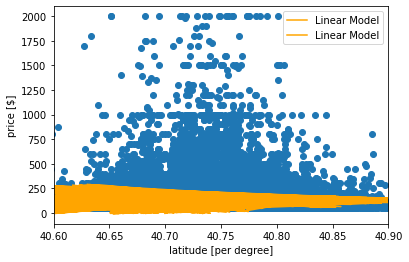

In [107]:
#Visualization
plt.scatter(df['latitude'], df['price'])
plt.plot(X_train, model.predict(X_train), color='orange', label='Linear Model')
plt.xlabel('latitude [per degree]')
plt.ylabel('price [$]')
plt.xlim([40.60,40.90])
plt.legend()
plt.show();

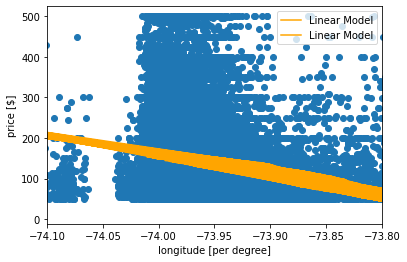

In [141]:
plt.scatter(df['longitude'], df['price'])
plt.plot(X_train, model.predict(X_train), color='orange', label='Linear Model')
plt.xlabel('longitude [per degree]')
plt.ylabel('price [$]')
plt.xlim([-74.10,-73.80])
plt.legend();

In [108]:
df[['room_type', 'price']]

,room_type,price
0,Private room,149
1,Entire home/apt,225
2,Private room,150
3,Entire home/apt,89
4,Entire home/apt,80
...,...,...
48889,Private room,65
48890,Private room,70
48892,Entire home/apt,115
48893,Shared room,55


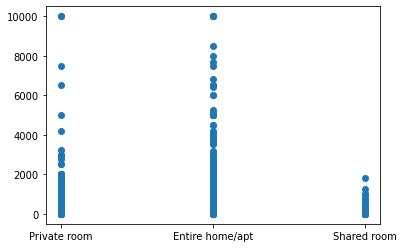

In [39]:
plt.scatter(df['room_type'],df['price'] )

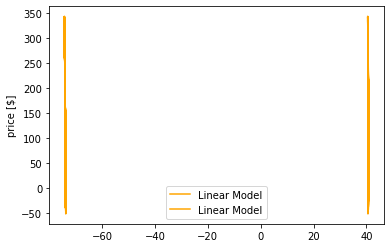

In [40]:
plt.plot(X_train,model.predict(X_train), color='orange', label='Linear Model')
plt.ylabel('price [$]')
plt.legend();

In [41]:
len(X_train)
len(model.predict(X_train))

33248

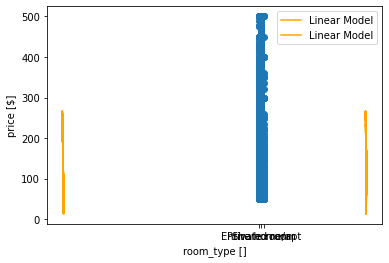

In [142]:
#Visualization
room_type = ['Entire home/apt', 'Private room', 'Shared room'] 
plt.scatter(df['room_type'], df['price'])
plt.plot(X_train, model.predict(X_train), color='orange', label='Linear Model')
plt.xlabel('room_type []')
plt.ylabel('price [$]')
plt.legend();

In [43]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#from category_encoders import OrdinalEncoder, OneHotEncoder

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [143]:
#Build the model1
#  Instantiate your model (class --> object)
model = LinearRegression()

# Fit your TRAINING data to the model
model.fit(X_train, y_train);

In [144]:
# build a logistic regression model 2 not included exerimented

oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)

model_lr = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         StandardScaler(),
                         LogisticRegression(random_state=42))

#model_lr.fit(X_train_T, y_train)

In [114]:
#Model 2: GradientBoostingModel
from sklearn.ensemble import GradientBoostingRegressor
oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)

#X_val_T = oe.transform(X_val)
model_gb = make_pipeline(OrdinalEncoder(),
SimpleImputer(),
GradientBoostingRegressor(random_state=42))
model_gb.fit(X_train_T, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           le....1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
   

In [ ]:
model_gb.predict(X_test_T)

In [115]:
#model 3
#FIT XGRADIENT BOOSTING MODEL
from xgboost import XGBRegressor
oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)


#X_test_T = oe.transform(X_test)
model_xg =  make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='median'),
                         XGBRegressor(random_state=42, n_jobs=10))
model_xg.fit(X_train_T, y_train)

[00:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=10,
                              nthread=None, objective='reg:linear',
                              random_state=42, reg_alpha=0, reg_lambda=1,
   

In [116]:
model_xg.predict(X_test_T)

array([117.5875 , 132.24712, 151.95183, ..., 172.70312, 186.76712,
       193.2972 ], dtype=float32)

In [117]:
#Model 4: RandomForest
from sklearn.ensemble import RandomForestRegressor

X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)

model_rf = make_pipeline(OrdinalEncoder(),
SimpleImputer(),
RandomForestRegressor(random_state=42))
model_rf.fit(X_train_T, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,


In [118]:
#model 5:DecisionTree
from sklearn.tree import DecisionTreeRegressor
X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)

model_dt = make_pipeline(OrdinalEncoder(),
SimpleImputer(),
DecisionTreeRegressor(random_state=42))
model_dt.fit(X_train_T, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=4

In [119]:
#Model 6
from sklearn.linear_model import Ridge
X_train_T = oe.fit_transform(X_train)
X_test_T = oe.fit_transform(X_test)

model_r =make_pipeline(
OrdinalEncoder(),
SimpleImputer(),
Ridge()
)
model_r.fit(X_train_T, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [120]:
print('XGradient Boost Validity MAE:',  mean_absolute_error(y_train, model_xg.predict(X_train_T)))

XGradient Boost Validity MAE: 72.84016203091367


In [121]:
#Mean_Absolute_Error
from sklearn.metrics import mean_absolute_error
print('Linear Regression Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))
#print('Logistic Regression Test MAE:', mean_absolute_error(y_test,model_lr.predict(X_test_T)))
print('DecisionTree Test MAE:', mean_absolute_error(y_test, model_dt.predict(X_test_T)))
print('Random Forest Test MAE:', mean_absolute_error(y_test, model_rf.predict(X_test_T)))
print('Gradient Boost Test MAE:', mean_absolute_error(y_test, model_gb.predict(X_test_T)))
print('Ridge Regression Test MAE:', mean_absolute_error(y_test, model_r.predict(X_test_T)))
print('XGradient Boost Test MAE:',  mean_absolute_error(y_test, model_xg.predict(X_test_T)))



Linear Regression Test MAE: 80.16146217444623
DecisionTree Test MAE: 108.97533401849948
Random Forest Test MAE: 92.80213724258688
Gradient Boost Test MAE: 79.93154340239916
Ridge Regression Test MAE: 87.77728290299139
XGradient Boost Test MAE: 79.79476186942466


In [123]:
from sklearn.metrics import r2_score
print('Linear Regression R2 score:',r2_score(y_test,model.predict(X_test_T)) )
#print('Logistic Regression R2 score:',r2_score(y_test,model_lr.predict(X_test_T)) )
print('Decision Tree R2 score:',r2_score(y_test,model_dt.predict(X_test_T)) )
print('Random Forest R2 score:',r2_score(y_test,model_rf.predict(X_test_T)) )
print('Gradient Boost R2 score:',r2_score(y_test,model_gb.predict(X_test_T)) )
print('Ridge Regression R2 score:',r2_score(y_test,model_r.predict(X_test_T)))
print('XGradient Boost R2 score:',r2_score(y_test,model_xg.predict(X_test_T)) )

Linear Regression R2 score: -185369121.02192992
Decision Tree R2 score: -0.845322105100546
Random Forest R2 score: -0.1691529912541847
Gradient Boost R2 score: 0.03959383677574413
Ridge Regression R2 score: 0.03495013209999276
XGradient Boost R2 score: 0.03897511117490271


In [124]:
from sklearn.metrics import mean_squared_error



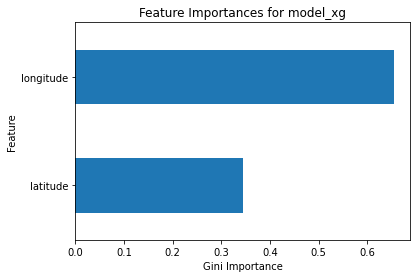

In [79]:
importances = model_xg.named_steps['xgbregressor'].feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for model_xg');